In [ ]:
# import xarray as xr
# import pandas as pd
# import glob
# import os
# from pathlib import Path
# import dask
# import xarray as xr

# # You need to explicitly enable parallel processing:
# combined = xr.open_mfdataset(
#     files, 
#     concat_dim='time',
#     combine='nested',
#     parallel=True,      # This is the key line!
#     chunks={'time': 10} # This creates dask arrays
# )

# def extract_date_from_filename(filename):
#     """Extract date from SMAP filename format like '20150727'"""
#     basename = os.path.basename(filename)
#     parts = basename.split('_')
#     for part in parts:
#         if len(part) == 8 and part.isdigit():
#             try:
#                 return pd.to_datetime(part, format='%Y%m%d')
#             except:
#                 continue
#     return None

# def combine_netcdf_files(folder_path, output_file):
#     """
#     Simple function to combine all NetCDF files in a folder
#     """
#     # Find all files
#     file_pattern = os.path.join(folder_path, "*_SMAP_L3_SSS_*_subsetted.nc4")
#     files = sorted(glob.glob(file_pattern))
    
#     if not files:
#         print(f"No files found matching pattern in {folder_path}")
#         return
    
#     print(f"Found {len(files)} files to combine")
    
#     # Quick file size check
#     sample_size = sum(os.path.getsize(f) for f in files[:5]) / 5
#     total_gb = (sample_size * len(files)) / (1024**3)
#     print(f"Estimated total size: {total_gb:.1f} GB")
    
#     if total_gb > 20:
#         print("Large dataset detected - using chunked processing...")
#         return combine_large_dataset(files, output_file)
#     else:
#         print("Using simple concatenation...")
#         return combine_small_dataset(files, output_file)

# def combine_small_dataset(files, output_file):
#     """For smaller datasets - load everything into memory"""
#     datasets = []
    
#     for i, file_path in enumerate(files):
#         if i % 100 == 0:
#             print(f"Processing file {i+1}/{len(files)}")
        
#         try:
#             ds = xr.open_dataset(file_path)
            
#             # Add time coordinate
#             date = extract_date_from_filename(file_path)
#             if date:
#                 ds = ds.expand_dims('time')
#                 ds = ds.assign_coords(time=[date])
#                 datasets.append(ds)
#             else:
#                 print(f"Warning: Could not extract date from {file_path}")
                
#         except Exception as e:
#             print(f"Error reading {file_path}: {e}")
#             continue
    
#     if not datasets:
#         print("No valid datasets found!")
#         return
    
#     # Combine all datasets
#     print("Concatenating datasets...")
#     combined = xr.concat(datasets, dim='time')
#     combined = combined.sortby('time')
    
#     # Add metadata
#     combined.attrs['created_from'] = f"{len(datasets)} SMAP files"
#     combined.attrs['creation_date'] = pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    
#     # Save with compression
#     print(f"Saving to {output_file}...")
#     encoding = {var: {'zlib': True, 'complevel': 1} for var in combined.data_vars}
#     combined.to_netcdf(output_file, encoding=encoding)
    
#     # Clean up
#     for ds in datasets:
#         ds.close()
#     combined.close()
    
#     print(f"✅ Successfully created {output_file}")
#     print(f"Time range: {combined.time.min().values} to {combined.time.max().values}")

# def combine_large_dataset(files, output_file):
#     """For larger datasets - use xarray's built-in chunking"""
#     print("Using xarray open_mfdataset for large dataset...")
    
#     # Use xarray's built-in multi-file dataset opener
#     def preprocess(ds):
#         """Add time coordinate during preprocessing"""
#         # This is tricky because we don't have filename in preprocess
#         # So we'll use a different approach
#         return ds
    
#     # Alternative approach for large datasets
#     temp_files = []
#     batch_size = 500  # Process in smaller batches
    
#     for i in range(0, len(files), batch_size):
#         batch = files[i:i + batch_size]
#         print(f"Processing batch {i//batch_size + 1}/{(len(files)-1)//batch_size + 1}")
        
#         batch_datasets = []
#         for file_path in batch:
#             try:
#                 ds = xr.open_dataset(file_path)
#                 date = extract_date_from_filename(file_path)
#                 if date:
#                     ds = ds.expand_dims('time')
#                     ds = ds.assign_coords(time=[date])
#                     batch_datasets.append(ds)
#             except Exception as e:
#                 print(f"Error with {file_path}: {e}")
#                 continue
        
#         if batch_datasets:
#             batch_combined = xr.concat(batch_datasets, dim='time')
#             temp_file = f"temp_batch_{i//batch_size}.nc4"
#             batch_combined.to_netcdf(temp_file)
#             temp_files.append(temp_file)
            
#             # Clean up
#             batch_combined.close()
#             for ds in batch_datasets:
#                 ds.close()
    
#     # Combine all temporary files
#     print("Combining all batches...")
#     if temp_files:
#         final_ds = xr.open_mfdataset(temp_files, concat_dim='time', combine='nested')
#         final_ds = final_ds.sortby('time')
        
#         # Save final result
#         encoding = {var: {'zlib': True, 'complevel': 1} for var in final_ds.data_vars}
#         final_ds.to_netcdf(output_file, encoding=encoding)
#         final_ds.close()
        
#         # Clean up temp files
#         for temp_file in temp_files:
#             os.remove(temp_file)
        
#         print(f"✅ Successfully created {output_file}")

# if __name__ == "__main__":
#     # Simple usage
#     folder_path = "SMAP_JPL_subset_v2"
#     output_file = "SMAP_combined_timeseries_v2.nc4"
    
#     combine_netcdf_files(folder_path, output_file)

Found 3660 files to combine
Estimated total size: 8.5 GB
Using simple concatenation...
Processing file 1/3660
Processing file 101/3660
Processing file 201/3660
Error reading SMAP_JPL_subset_v2\101657516_SMAP_L3_SSS_20160111_8DAYS_V5_subsetted.nc4: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'gini', 'kerchunk', 'rasterio', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html
Processing file 301/3660
Processing file 401/3660
Processing file 501/3660
Processing file 601/3660
Processing file 701/3660
Processing file 801/3660
Processing file 901/3660
Processing file 1001/3660
Processing file 1101/3660
Processing file 1201/3660
Processing file 1301/3660
Processing file 1401/3660
Processing file 1501/3660
Processing fil

In [1]:
import xarray as xr
import pandas as pd
import glob
import os
from tqdm import tqdm
from dask.distributed import Client, as_completed
import dask

def extract_date_from_filename(filename):
    """Extract date from SMAP filename format like '20150727'"""
    basename = os.path.basename(filename)
    parts = basename.split('_')
    for part in parts:
        if len(part) == 8 and part.isdigit():
            try:
                return pd.to_datetime(part, format='%Y%m%d')
            except:
                continue
    return None

def process_single_file(file_path):
    """Process a single file and return dataset with time coordinate"""
    try:
        ds = xr.open_dataset(file_path)
        date = extract_date_from_filename(file_path)
        if date:
            ds = ds.expand_dims('time')
            ds = ds.assign_coords(time=[date])
            return ds
        else:
            print(f"Warning: Could not extract date from {file_path}")
            return None
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

def combine_netcdf_files(folder_path, output_file, n_workers=None):
    """
    Combine NetCDF files with parallel processing and progress tracking
    """
    # Find all files
    file_pattern = os.path.join(folder_path, "*_SMAP_L3_SSS_*_subsetted.nc4")
    files = sorted(glob.glob(file_pattern))
    
    if not files:
        print(f"No files found matching pattern in {folder_path}")
        return
    
    print(f"Found {len(files)} files to combine")
    
    # Quick file size check
    sample_size = sum(os.path.getsize(f) for f in files[:5]) / 5
    total_gb = (sample_size * len(files)) / (1024**3)
    print(f"Estimated total size: {total_gb:.1f} GB")
    
    # Start dask client for parallel processing
    print("Starting parallel processing...")
    with Client(n_workers=n_workers, threads_per_worker=2, memory_limit='2GB') as client:
        print(f"Dask dashboard: {client.dashboard_link}")
        
        # Submit all tasks
        futures = client.map(process_single_file, files)
        
        # Collect results with progress bar
        datasets = []
        print("Processing files...")
        for future in tqdm(as_completed(futures), total=len(futures), desc="Files processed"):
            result = future.result()
            if result is not None:
                datasets.append(result)
    
    if not datasets:
        print("No valid datasets found!")
        return
    
    print(f"Successfully processed {len(datasets)} files")
    
    # Combine datasets with progress
    print("Concatenating datasets...")
    combined = xr.concat(datasets, dim='time')
    combined = combined.sortby('time')
    
    # Add metadata
    combined.attrs['created_from'] = f"{len(datasets)} SMAP files"
    combined.attrs['creation_date'] = pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    
    # Save with compression and progress
    print(f"Saving to {output_file}...")
    encoding = {var: {'zlib': True, 'complevel': 1} for var in combined.data_vars}
    
    # Use tqdm callback for save progress (if dataset is large)
    combined.to_netcdf(output_file, encoding=encoding)
    
    # Clean up
    for ds in datasets:
        ds.close()
    combined.close()
    
    print(f" Successfully created {output_file}")
    print(f" Time range: {combined.time.min().values} to {combined.time.max().values}")
    print(f" File size: {os.path.getsize(output_file) / (1024**3):.1f} GB")

if __name__ == "__main__":
    # Usage
    folder_path = "SMAP_JPL_subset_v3"
    output_file = "SMAP_combined_timeseries_v3.nc4"
    
    # Optional: specify number of workers
    combine_netcdf_files(folder_path, output_file, n_workers=6)

Found 3588 files to combine
Estimated total size: 8.3 GB
Starting parallel processing...
Dask dashboard: http://127.0.0.1:8787/status
Processing files...


Files processed: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 3588/3588 [03:39<00:00, 16.32it/s]
Exception in callback BaseIOStream.write.<locals>.<lambda>(<Future cancelled>) at C:\Users\jspier\AppData\Local\miniconda3\envs\geo_env\lib\site-packages\tornado\iostream.py:536
handle: <Handle BaseIOStream.write.<locals>.<lambda>(<Future cancelled>) at C:\Users\jspier\AppData\Local\miniconda3\envs\geo_env\lib\site-packages\tornado\iostream.py:536>
Traceback (most recent call last):
  File "C:\Users\jspier\AppData\Local\miniconda3\envs\geo_env\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\jspier\AppData\Local\miniconda3\envs\geo_env\lib\site-packages\tornado\iostream.py", line 536, in <lambda>
    future.add_done_callback(lambda f: f.exception())
asyncio.exceptions.CancelledError
Exception in callback multi_future.<locals>.callback(<Task cancell...ession.py:77>>) at C:\Users\jsp

Successfully processed 3587 files
Concatenating datasets...
Saving to SMAP_combined_timeseries_v2.nc4...
✅ Successfully created SMAP_combined_timeseries_v2.nc4
📊 Time range: 2015-05-04T00:00:00.000000000 to 2025-06-03T00:00:00.000000000
📁 File size: 5.5 GB


NETCDF QUALITY CONTROL INSPECTION
File: SMAP_combined_timeseries_v2.nc4
✅ File loaded successfully!

📊 BASIC FILE INFORMATION
----------------------------------------
File size: 5.5 GB
Dimensions: {'time': 3587, 'latitude': 340, 'longitude': 520}
Variables: ['smap_sss_uncertainty', 'smap_spd', 'ice_fraction', 'anc_sst', 'weight', 'land_fraction', 'smap_high_spd', 'smap_sss', 'anc_sss']
Coordinates: ['longitude', 'latitude', 'time']

⏰ TIME DIMENSION ANALYSIS
----------------------------------------
Time range: 2015-05-04 to 2025-06-03
Total time steps: 3587
Expected for daily data: 3684 days
⚠️  Found 21 time gaps larger than 1 day:
📋 ALL TIME GAPS:
Gap #  Start Date   End Date     Gap Size   Missing Days
------------------------------------------------------------
1      2016-01-10   2016-01-12   2          1
2      2019-06-21   2019-07-21   30         29
3      2020-04-08   2020-04-10   2          1
4      2020-05-29   2020-05-31   2          1
5      2020-06-17   2020-06-19   2     

ValueError: 'lat' not found in array dimensions ('time', 'latitude', 'longitude')

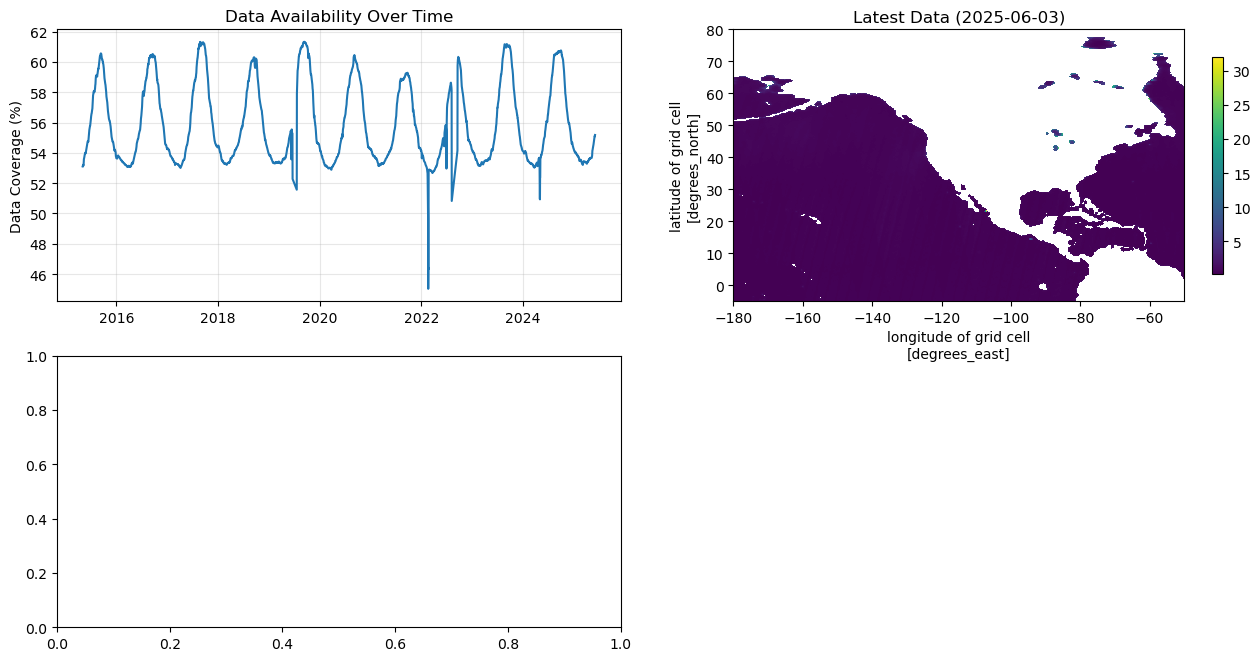

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def inspect_netcdf_file(netcdf_path):
    """
    Comprehensive inspection of combined NetCDF file
    """
    
    print("=" * 60)
    print(f"NETCDF QUALITY CONTROL INSPECTION")
    print(f"File: {netcdf_path}")
    print("=" * 60)
    
    # Load the dataset
    try:
        ds = xr.open_dataset(netcdf_path)
        print("✅ File loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return
    
    # 1. BASIC FILE INFORMATION
    print(f"\n📊 BASIC FILE INFORMATION")
    print("-" * 40)
    print(f"File size: {get_file_size(netcdf_path)}")
    print(f"Dimensions: {dict(ds.dims)}")
    print(f"Variables: {list(ds.data_vars.keys())}")
    print(f"Coordinates: {list(ds.coords.keys())}")
    
    # 2. TIME DIMENSION ANALYSIS
    print(f"\n⏰ TIME DIMENSION ANALYSIS")
    print("-" * 40)
    analyze_time_dimension(ds)
    
    # 3. SPATIAL DIMENSION ANALYSIS  
    print(f"\n🌍 SPATIAL DIMENSION ANALYSIS")
    print("-" * 40)
    analyze_spatial_dimensions(ds)
    
    # 4. DATA QUALITY CHECKS
    print(f"\n🔍 DATA QUALITY CHECKS")
    print("-" * 40)
    analyze_data_quality(ds)
    
    # 5. TEMPORAL COVERAGE
    print(f"\n📅 TEMPORAL COVERAGE")
    print("-" * 40)
    analyze_temporal_coverage(ds)
    
    # 6. METADATA CHECK
    print(f"\n📝 METADATA CHECK")
    print("-" * 40)
    check_metadata(ds)
    
    # 7. CREATE DIAGNOSTIC PLOTS
    print(f"\n📈 CREATING DIAGNOSTIC PLOTS")
    print("-" * 40)
    create_diagnostic_plots(ds, netcdf_path)
    
    # 8. SUMMARY
    print(f"\n✅ SUMMARY & RECOMMENDATIONS")
    print("-" * 40)
    provide_summary(ds)
    
    ds.close()

def get_file_size(file_path):
    """Get human-readable file size"""
    import os
    size_bytes = os.path.getsize(file_path)
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size_bytes < 1024.0:
            return f"{size_bytes:.1f} {unit}"
        size_bytes /= 1024.0

def analyze_time_dimension(ds):
    """Analyze time dimension for completeness and consistency"""
    
    if 'time' not in ds.dims:
        print("❌ No time dimension found!")
        return
    
    times = pd.to_datetime(ds.time.values)
    
    print(f"Time range: {times.min().strftime('%Y-%m-%d')} to {times.max().strftime('%Y-%m-%d')}")
    print(f"Total time steps: {len(times)}")
    print(f"Expected for daily data: {(times.max() - times.min()).days + 1} days")
    
    # Check for gaps
    time_diffs = np.diff(times)
    expected_diff = pd.Timedelta(days=1)
    
    gaps = time_diffs[time_diffs > expected_diff]
    if len(gaps) > 0:
        print(f"⚠️  Found {len(gaps)} time gaps larger than 1 day:")
        gap_indices = np.where(time_diffs > expected_diff)[0]
        print(f"📋 ALL TIME GAPS:")
        print(f"{'Gap #':<6} {'Start Date':<12} {'End Date':<12} {'Gap Size':<10} {'Missing Days'}")
        print("-" * 60)
        
        total_missing_days = 0
        for i, gap_idx in enumerate(gap_indices):
            gap_start = times[gap_idx]
            gap_end = times[gap_idx + 1]
            gap_size = (gap_end - gap_start).days
            missing_days = gap_size - 1  # Subtract 1 because we expect 1 day difference
            total_missing_days += missing_days
            
            print(f"{i+1:<6} {gap_start.strftime('%Y-%m-%d'):<12} {gap_end.strftime('%Y-%m-%d'):<12} {gap_size:<10} {missing_days}")
        
        print("-" * 60)
        print(f"📊 SUMMARY: Total missing days = {total_missing_days}")
        print(f"📊 Data completeness = {((len(times)) / (len(times) + total_missing_days) * 100):.1f}%")
    else:
        print("✅ No significant time gaps found")
    
    # Check for duplicates
    duplicates = times[times.duplicated()]
    if len(duplicates) > 0:
        print(f"⚠️  Found {len(duplicates)} duplicate time stamps:")
        for dup in duplicates[:5]:
            print(f"   {dup.strftime('%Y-%m-%d')}")
    else:
        print("✅ No duplicate time stamps")
    
    # Check time ordering
    if times.is_monotonic_increasing:
        print("✅ Times are properly ordered")
    else:
        print("⚠️  Times are not monotonically increasing!")

def analyze_spatial_dimensions(ds):
    """Analyze spatial dimensions"""
    
    # Find lat/lon coordinates
    lat_names = ['lat', 'latitude', 'y']
    lon_names = ['lon', 'longitude', 'x']
    
    lat_coord = None
    lon_coord = None
    
    for name in lat_names:
        if name in ds.coords:
            lat_coord = name
            break
    
    for name in lon_names:
        if name in ds.coords:
            lon_coord = name
            break
    
    if lat_coord and lon_coord:
        lats = ds[lat_coord].values
        lons = ds[lon_coord].values
        
        print(f"Latitude range: {lats.min():.2f}° to {lats.max():.2f}°")
        print(f"Longitude range: {lons.min():.2f}° to {lons.max():.2f}°")
        print(f"Spatial grid: {len(lats)} x {len(lons)} points")
        
        # Check coordinate spacing
        lat_spacing = np.diff(lats)
        lon_spacing = np.diff(lons)
        
        print(f"Latitude spacing: {np.mean(lat_spacing):.3f}° ± {np.std(lat_spacing):.3f}°")
        print(f"Longitude spacing: {np.mean(lon_spacing):.3f}° ± {np.std(lon_spacing):.3f}°")
        
        # Check for regular grid
        if np.std(lat_spacing) < 0.001 and np.std(lon_spacing) < 0.001:
            print("✅ Regular spatial grid detected")
        else:
            print("⚠️  Irregular spatial grid detected")
    else:
        print("❌ Could not identify lat/lon coordinates")

def analyze_data_quality(ds):
    """Analyze data quality for each variable"""
    
    for var_name in ds.data_vars:
        var = ds[var_name]
        print(f"\nVariable: {var_name}")
        
        # Basic statistics
        total_points = var.size
        valid_points = np.sum(~np.isnan(var.values))
        nan_percentage = (total_points - valid_points) / total_points * 100
        
        print(f"  Shape: {var.shape}")
        print(f"  Valid points: {valid_points:,} / {total_points:,} ({100-nan_percentage:.1f}%)")
        print(f"  NaN percentage: {nan_percentage:.1f}%")
        
        if valid_points > 0:
            data_flat = var.values.flatten()
            data_valid = data_flat[~np.isnan(data_flat)]
            
            print(f"  Value range: {data_valid.min():.3f} to {data_valid.max():.3f}")
            print(f"  Mean: {data_valid.mean():.3f} ± {data_valid.std():.3f}")
            
            # Check for reasonable oceanographic values
            if 'sss' in var_name.lower() or 'salinity' in var_name.lower():
                if data_valid.min() < 0 or data_valid.max() > 50:
                    print("  ⚠️  Unrealistic salinity values detected!")
                else:
                    print("  ✅ Salinity values within reasonable range")
            
            elif 'sst' in var_name.lower() or 'temperature' in var_name.lower():
                if data_valid.min() < -5 or data_valid.max() > 50:
                    print("  ⚠️  Unrealistic temperature values detected!")
                else:
                    print("  ✅ Temperature values within reasonable range")

def analyze_temporal_coverage(ds):
    """Analyze temporal coverage and sampling"""
    
    if 'time' not in ds.dims:
        return
    
    times = pd.to_datetime(ds.time.values)
    
    # Year coverage
    years = times.year.unique()
    print(f"Years covered: {years.min()} - {years.max()} ({len(years)} years)")
    print(f"Years: {', '.join(map(str, sorted(years)))}")
    
    # Monthly coverage
    try:
        df_times = pd.DataFrame({'time': times})
        df_times['year'] = df_times['time'].dt.year
        df_times['month'] = df_times['time'].dt.month
        monthly_counts = df_times.groupby(['year', 'month']).size()
        print(f"Average points per month: {monthly_counts.mean():.1f}")
    except Exception as e:
        print(f"Could not calculate monthly coverage: {e}")
    
    # Seasonal coverage
    seasons = {
        'Winter': [12, 1, 2],
        'Spring': [3, 4, 5],
        'Summer': [6, 7, 8],
        'Fall': [9, 10, 11]
    }
    
    print("Seasonal coverage:")
    for season, months in seasons.items():
        seasonal_count = sum(times.month.isin(months))
        percentage = seasonal_count / len(times) * 100
        print(f"  {season}: {seasonal_count} points ({percentage:.1f}%)")

def check_metadata(ds):
    """Check global attributes and metadata"""
    
    print("Global attributes:")
    for attr, value in ds.attrs.items():
        print(f"  {attr}: {value}")
    
    # Check for important metadata
    important_attrs = ['created_from', 'creation_date', 'temporal_resolution', 'data_type']
    missing_attrs = [attr for attr in important_attrs if attr not in ds.attrs]
    
    if missing_attrs:
        print(f"⚠️  Missing recommended attributes: {', '.join(missing_attrs)}")
    else:
        print("✅ All recommended attributes present")

def create_diagnostic_plots(ds, file_path):
    """Create diagnostic plots"""
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(16, 12))
    
    # Plot 1: Time series of data availability
    ax1 = plt.subplot(3, 2, 1)
    plot_data_availability(ds, ax1)
    
    # Plot 2: Spatial coverage (latest time)
    ax2 = plt.subplot(3, 2, 2)
    plot_spatial_coverage(ds, ax2)
    
    # Plot 3: Time series of spatial mean
    ax3 = plt.subplot(3, 2, 3)
    plot_time_series_mean(ds, ax3)
    
    # Plot 4: Distribution of values
    ax4 = plt.subplot(3, 2, 4)
    plot_value_distribution(ds, ax4)
    
    # Plot 5: Seasonal climatology
    ax5 = plt.subplot(3, 2, 5)
    plot_seasonal_climatology(ds, ax5)
    
    # Plot 6: Data quality over time
    ax6 = plt.subplot(3, 2, 6)
    plot_data_quality_time(ds, ax6)
    
    plt.tight_layout()
    
    # Save plot
    plot_name = f"{file_path.replace('.nc4', '_diagnostics.png')}"
    plt.savefig(plot_name, dpi=300, bbox_inches='tight')
    print(f"Diagnostic plots saved as: {plot_name}")
    plt.show()

def plot_data_availability(ds, ax):
    """Plot data availability over time"""
    if 'time' not in ds.dims:
        return
    
    # Calculate percentage of valid data for each time step
    var_name = list(ds.data_vars.keys())[0]  # Use first variable
    var = ds[var_name]
    
    valid_percentage = []
    times = []
    
    for i, time_val in enumerate(ds.time.values):
        time_slice = var.isel(time=i)
        total_points = time_slice.size
        valid_points = np.sum(~np.isnan(time_slice.values))
        valid_percentage.append(valid_points / total_points * 100)
        times.append(pd.to_datetime(time_val))
    
    ax.plot(times, valid_percentage)
    ax.set_ylabel('Data Coverage (%)')
    ax.set_title('Data Availability Over Time')
    ax.grid(True, alpha=0.3)

def plot_spatial_coverage(ds, ax):
    """Plot spatial coverage for most recent time"""
    if 'time' not in ds.dims:
        return
        
    var_name = list(ds.data_vars.keys())[0]
    latest_data = ds[var_name].isel(time=-1)
    
    # Find lat/lon coordinates
    lat_coord = 'lat' if 'lat' in ds.coords else 'latitude'
    lon_coord = 'lon' if 'lon' in ds.coords else 'longitude'
    
    if lat_coord in ds.coords and lon_coord in ds.coords:
        im = latest_data.plot(ax=ax, add_colorbar=False)
        ax.set_title(f'Latest Data ({pd.to_datetime(ds.time.values[-1]).strftime("%Y-%m-%d")})')
        plt.colorbar(im, ax=ax, shrink=0.8)

def plot_time_series_mean(ds, ax):
    """Plot time series of spatial mean"""
    if 'time' not in ds.dims:
        return
        
    var_name = list(ds.data_vars.keys())[0]
    spatial_mean = ds[var_name].mean(['lat', 'lon'], skipna=True)
    
    times = pd.to_datetime(ds.time.values)
    ax.plot(times, spatial_mean.values)
    ax.set_ylabel(f'{var_name}')
    ax.set_title('Spatial Mean Time Series')
    ax.grid(True, alpha=0.3)

def plot_value_distribution(ds, ax):
    """Plot distribution of values"""
    var_name = list(ds.data_vars.keys())[0]
    data_flat = ds[var_name].values.flatten()
    data_valid = data_flat[~np.isnan(data_flat)]
    
    # Subsample if too many points
    if len(data_valid) > 100000:
        data_valid = np.random.choice(data_valid, 100000, replace=False)
    
    ax.hist(data_valid, bins=50, alpha=0.7, edgecolor='black')
    ax.set_xlabel(f'{var_name}')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Values')

def plot_seasonal_climatology(ds, ax):
    """Plot seasonal climatology"""
    if 'time' not in ds.dims:
        return
        
    var_name = list(ds.data_vars.keys())[0]
    
    # Calculate monthly means
    monthly_means = ds[var_name].groupby('time.month').mean(['lat', 'lon'], skipna=True)
    
    months = range(1, 13)
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    ax.plot(months, monthly_means.values, 'o-')
    ax.set_xticks(months)
    ax.set_xticklabels(month_names)
    ax.set_ylabel(f'{var_name}')
    ax.set_title('Seasonal Climatology (Spatial Mean)')
    ax.grid(True, alpha=0.3)

def plot_data_quality_time(ds, ax):
    """Plot data quality metrics over time"""
    if 'time' not in ds.dims:
        return
        
    var_name = list(ds.data_vars.keys())[0]
    
    # Calculate monthly data coverage
    times = pd.to_datetime(ds.time.values)
    df = pd.DataFrame({'time': times})
    df['year_month'] = df['time'].dt.to_period('M')
    
    monthly_coverage = []
    year_months = []
    
    for ym in df['year_month'].unique():
        mask = df['year_month'] == ym
        time_indices = df.index[mask]
        
        if len(time_indices) > 0:
            monthly_data = ds[var_name].isel(time=time_indices)
            total_points = monthly_data.size
            valid_points = np.sum(~np.isnan(monthly_data.values))
            coverage = valid_points / total_points * 100
            
            monthly_coverage.append(coverage)
            year_months.append(ym.to_timestamp())
    
    ax.plot(year_months, monthly_coverage, 'o-')
    ax.set_ylabel('Monthly Data Coverage (%)')
    ax.set_title('Data Quality Over Time')
    ax.grid(True, alpha=0.3)

def provide_summary(ds):
    """Provide summary and recommendations"""
    
    issues = []
    recommendations = []
    
    # Check basic structure
    if 'time' not in ds.dims:
        issues.append("No time dimension found")
    
    # Check for variables
    if len(ds.data_vars) == 0:
        issues.append("No data variables found")
    
    # Check data coverage
    for var_name in ds.data_vars:
        var = ds[var_name]
        valid_percentage = np.sum(~np.isnan(var.values)) / var.size * 100
        
        if valid_percentage < 50:
            issues.append(f"Low data coverage for {var_name}: {valid_percentage:.1f}%")
        elif valid_percentage < 80:
            recommendations.append(f"Consider quality control for {var_name} (coverage: {valid_percentage:.1f}%)")
    
    # Print summary
    if not issues and not recommendations:
        print("🎉 EXCELLENT! Your combined NetCDF file looks great!")
        print("✅ All quality checks passed")
        print("✅ Ready for analysis")
    else:
        if issues:
            print("❌ ISSUES FOUND:")
            for issue in issues:
                print(f"   • {issue}")
        
        if recommendations:
            print("💡 RECOMMENDATIONS:")
            for rec in recommendations:
                print(f"   • {rec}")
    
    print(f"\n📋 NEXT STEPS:")
    print(f"   1. Review the diagnostic plots")
    print(f"   2. Check any flagged issues above")
    print(f"   3. If everything looks good, proceed with your analysis!")
    print(f"   4. Consider clipping to your study area if needed")

# Example usage
if __name__ == "__main__":
    # Inspect your combined file
    inspect_netcdf_file("SMAP_combined_timeseries_v2.nc4")